In [ ]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving framingham_heart_disease.csv to framingham_heart_disease.csv


In [ ]:
df = pd.read_csv('/content/framingham_heart_disease.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.info()
df.describe()
df.isnull().sum()
df.nunique()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [ ]:
df = df.dropna()

In [ ]:
y = df['TenYearCHD']
X = df.drop(['TenYearCHD'], axis=1)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('framingham_heart_disease.csv')

# Drop rows with missing values
df = df.dropna()

# Target & Features
y = df['TenYearCHD']
X = df.drop(['TenYearCHD', 'education'], axis=1)

# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8593


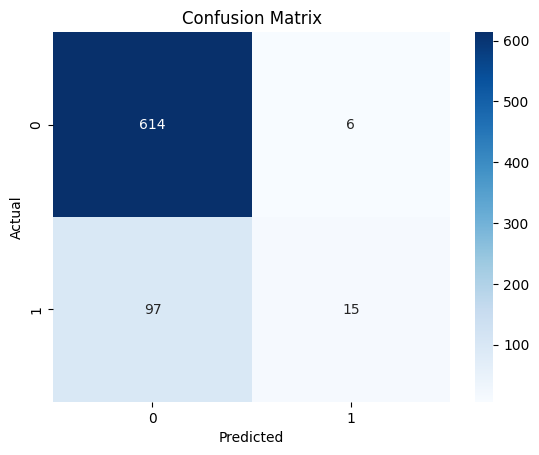

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       620
           1       0.71      0.13      0.23       112

    accuracy                           0.86       732
   macro avg       0.79      0.56      0.57       732
weighted avg       0.84      0.86      0.82       732



In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8593


In [ ]:
print(y.value_counts(normalize=True))

TenYearCHD
0    0.847648
1    0.152352
Name: proportion, dtype: float64


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       620
           1       0.71      0.13      0.23       112

    accuracy                           0.86       732
   macro avg       0.79      0.56      0.57       732
weighted avg       0.84      0.86      0.82       732



In [ ]:
model = LogisticRegression(class_weight = 'balanced', random_state = 42)
model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [ ]:
y_pred = model.predict(X_test)

y_probs = model.predict_proba(X_test)[:, 1]

In [ ]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Accuracy: 0.6844
              precision    recall  f1-score   support

           0       0.92      0.69      0.79       620
           1       0.28      0.68      0.40       112

    accuracy                           0.68       732
   macro avg       0.60      0.68      0.59       732
weighted avg       0.82      0.68      0.73       732



In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Train the model on the resampled data
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_res, y_res)


LogisticRegression(class_weight='balanced', random_state=42)

In [ ]:
model = LogisticRegression(class_weight='balanced', C=1.0, solver='liblinear', random_state=42)
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

In [ ]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Accuracy: 0.6844
              precision    recall  f1-score   support

           0       0.92      0.69      0.79       620
           1       0.28      0.68      0.40       112

    accuracy                           0.68       732
   macro avg       0.60      0.68      0.59       732
weighted avg       0.82      0.68      0.73       732



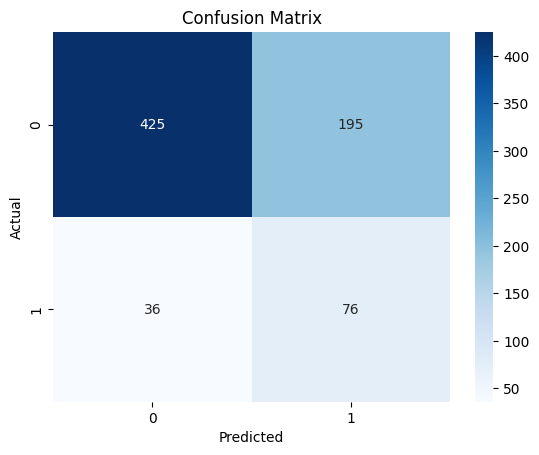

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


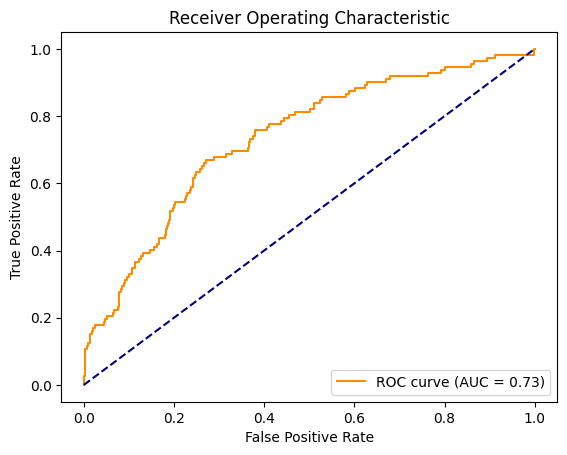

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(scale_pos_weight=len(y_train) / (2 * sum(y_train == 1)), random_state=42)
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred_adjusted = (y_probs >= 0.3).astype(int)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', random_state=42)

# Stratified K-Fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-validated Accuracy: {cv_scores.mean():.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validated Accuracy: 0.6499


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred = model.predict(X_test)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.6844


In [ ]:
from sklearn.metrics import classification_report

# Print classification report for precision, recall, F1-score, and accuracy
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.69      0.79       620
           1       0.28      0.68      0.40       112

    accuracy                           0.68       732
   macro avg       0.60      0.68      0.59       732
weighted avg       0.82      0.68      0.73       732



In [ ]:
# Check the class distribution in the training set
print(f"Class distribution in training set: {y_train.value_counts()}")
print(f"Class distribution in testing set: {y_test.value_counts()}")


Class distribution in training set: TenYearCHD
0    2479
1     445
Name: count, dtype: int64
Class distribution in testing set: TenYearCHD
0    620
1    112
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution in the resampled training set
print(f"Class distribution in resampled training set: {y_train_resampled.value_counts()}")


Class distribution in resampled training set: TenYearCHD
0    2479
1    2479
Name: count, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression with class weights
model = LogisticRegression(class_weight='balanced', random_state=42)

# Fit the model to the resampled data
model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.69      0.79       620
           1       0.29      0.69      0.41       112

    accuracy                           0.69       732
   macro avg       0.61      0.69      0.60       732
weighted avg       0.83      0.69      0.73       732



In [ ]:
# Get the predicted probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Try a lower threshold, e.g., 0.3
y_pred_adjusted = (y_probs >= 0.3).astype(int)

# Evaluate performance
print(classification_report(y_test, y_pred_adjusted))


              precision    recall  f1-score   support

           0       0.95      0.36      0.52       620
           1       0.20      0.90      0.33       112

    accuracy                           0.44       732
   macro avg       0.58      0.63      0.42       732
weighted avg       0.84      0.44      0.49       732



In [ ]:
# Get the predicted probabilities for class 1 (heart disease)
y_probs = model.predict_proba(X_test)[:, 1]

# Try different thresholds and evaluate the model at each step
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
for threshold in thresholds:
    y_pred_adjusted = (y_probs >= threshold).astype(int)
    print(f"Threshold: {threshold}")
    print(classification_report(y_test, y_pred_adjusted))
    print("-" * 50)


Threshold: 0.4
              precision    recall  f1-score   support

           0       0.93      0.55      0.69       620
           1       0.24      0.78      0.36       112

    accuracy                           0.58       732
   macro avg       0.58      0.66      0.53       732
weighted avg       0.83      0.58      0.64       732

--------------------------------------------------
Threshold: 0.45
              precision    recall  f1-score   support

           0       0.93      0.62      0.74       620
           1       0.26      0.73      0.38       112

    accuracy                           0.64       732
   macro avg       0.59      0.68      0.56       732
weighted avg       0.83      0.64      0.69       732

--------------------------------------------------
Threshold: 0.5
              precision    recall  f1-score   support

           0       0.92      0.69      0.79       620
           1       0.29      0.69      0.41       112

    accuracy                      

In [ ]:
# Test intermediate thresholds 0.57 and 0.58
thresholds = [0.57, 0.58]
for threshold in thresholds:
    y_pred_adjusted = (y_probs >= threshold).astype(int)
    print(f"Threshold: {threshold}")
    print(classification_report(y_test, y_pred_adjusted))
    print("-" * 50)


Threshold: 0.57
              precision    recall  f1-score   support

           0       0.91      0.77      0.83       620
           1       0.31      0.56      0.40       112

    accuracy                           0.74       732
   macro avg       0.61      0.67      0.61       732
weighted avg       0.81      0.74      0.77       732

--------------------------------------------------
Threshold: 0.58
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       620
           1       0.31      0.54      0.40       112

    accuracy                           0.75       732
   macro avg       0.61      0.66      0.62       732
weighted avg       0.81      0.75      0.77       732

--------------------------------------------------


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming you've already trained the model and the scaler
# Here we're using the scaler and model from your previous work

# Example of the columns for the input
columns = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
           'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
           'diaBP', 'BMI', 'heartRate', 'glucose']

# Example: Let's assume your model is stored in 'model' and scaler in 'scaler'

# Function for predicting heart disease
def predict_heart_disease(inputs):
    # Convert the input into a DataFrame
    input_data = pd.DataFrame([inputs], columns=columns)

    # Apply scaling (ensure you use the same scaler that was used during training)
    input_data_scaled = scaler.transform(input_data)

    # Get the predicted probabilities for class 1 (heart disease)
    prob = model.predict_proba(input_data_scaled)[:, 1]

    # Use threshold 0.58 to make the prediction (based on the model you created)
    prediction = (prob >= 0.58).astype(int)[0]

    # Output the result
    if prediction == 1:
        return "The person is predicted to have heart disease."
    else:
        return "The person is predicted to not have heart disease."


user_input = [1, 50, 12, 1, 20, 0, 0, 0, 0, 240, 130, 80, 28.5, 75, 90]

# Call the function and get the prediction
result = predict_heart_disease(user_input)
print(result)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- education


In [ ]:
print(.columns)

AttributeError: 'LogisticRegression' object has no attribute 'columns'

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Example of loading your data (adjust this with your actual dataset)
# df = pd.read_csv('your_dataset.csv')

# Assuming the dataset is loaded as 'df' and includes 'TenYearCHD' as the target variable
X = df.drop(columns=['TenYearCHD'])  # Features
y = df['TenYearCHD']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply scaling if necessary
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Check which features are being used (i.e., the order of columns)
print("Features used for training:", X_train.columns)

# Inspect the model's coefficients to see if 'education' is used
print("Model coefficients:", model.coef_)

# Check the column names from the trained model's coef_
# If 'education' is used, you should see a coefficient corresponding to it


Features used for training: Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')
Model coefficients: [[ 0.31545077  0.58440416 -0.05537612  0.10575256  0.1771883   0.04132039
   0.06517109  0.10775875  0.06324189  0.1324745   0.34174322 -0.07601091
   0.01660361 -0.07213247  0.14044227]]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assume that the model and scaler are already trained
# 'model' is the trained Logistic Regression model
# 'scaler' is the StandardScaler used during training

# Columns used for training
columns = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
           'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
           'diaBP', 'BMI', 'heartRate', 'glucose']

# Function to predict heart disease
def predict_heart_disease(inputs):
    # Convert inputs to a DataFrame
    input_data = pd.DataFrame([inputs], columns=columns)

    # Apply scaling (use the same scaler as used during training)
    input_data_scaled = scaler.transform(input_data)  # Scaling the data

    # Get the predicted probabilities for class 1 (heart disease)
    prob = model.predict_proba(input_data_scaled)[:, 1]

    # Use threshold of 0.58 for classification
    prediction = (prob >= 0.58).astype(int)[0]

    # Output the result
    if prediction == 1:
        return "The person is predicted to have heart disease."
    else:
        return "The person is predicted to not have heart disease."

# Example user input (replace with actual values)
user_input = [1, 50, 3, 1, 20, 0, 0, 0, 0, 240, 130, 80, 28.5, 75, 90]  # Example input values

# Call the function and get the prediction
result = predict_heart_disease(user_input)
print(result)


The person is predicted to not have heart disease.


In [ ]:
from sklearn.metrics import classification_report

# Assuming 'X_test' is your test data and 'y_test' is the true labels
# Assuming 'model' is your trained logistic regression model

# Make predictions on the test data
y_pred = model.predict(X_test)

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       610
           1       0.17      1.00      0.29       122

    accuracy                           0.17       732
   macro avg       0.08      0.50      0.14       732
weighted avg       0.03      0.17      0.05       732



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sample

In [ ]:
# Tune the threshold (e.g., 0.45, 0.5, 0.55) and see how it affects performance
threshold = 0.58
y_pred = (model.predict_proba(X_test)[:, 1] >= threshold).astype(int)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
